In [4]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from IPython.display import Image
import urllib.request
import bs4

In [2]:
vworld = "http://www.vworld.kr/dev/v4api.do"
print(vworld)

http://www.vworld.kr/dev/v4api.do


# 필요한 준비물
## 1. vworld아이디
## 2. vworld api키

키 값 발급받는 법

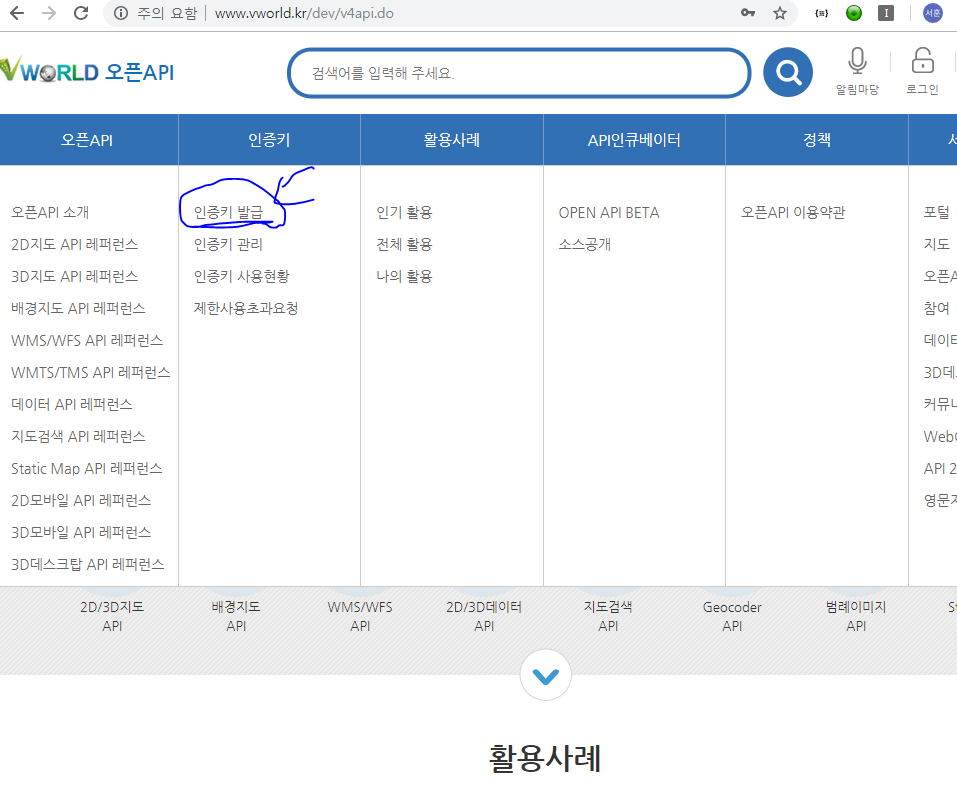

In [14]:
Image("C:\\Users\\504-02\\Desktop\\3.png")

# 순서대로 입력
1. 아무 페이지나 입력해도 상관없음
2. 사용목적 입력
3. 사용기관은 민간이니 민간에 체크
4. 마지막으로 지도 인증키 받기

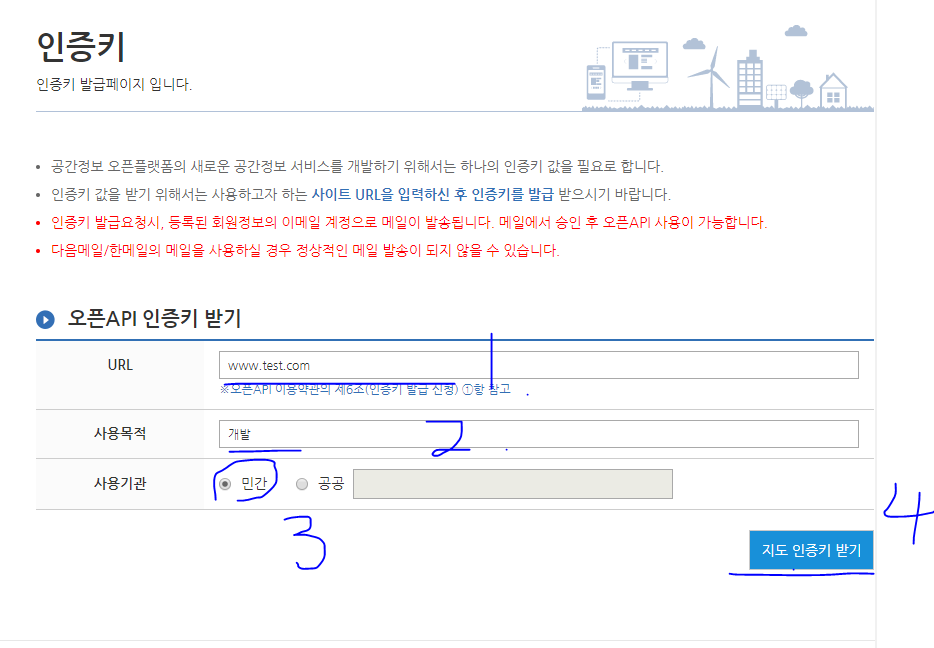

In [15]:
Image("C:\\Users\\504-02\\Desktop\\4.png")

인증키 관리 들어가서 인증키값 복사하면 끝

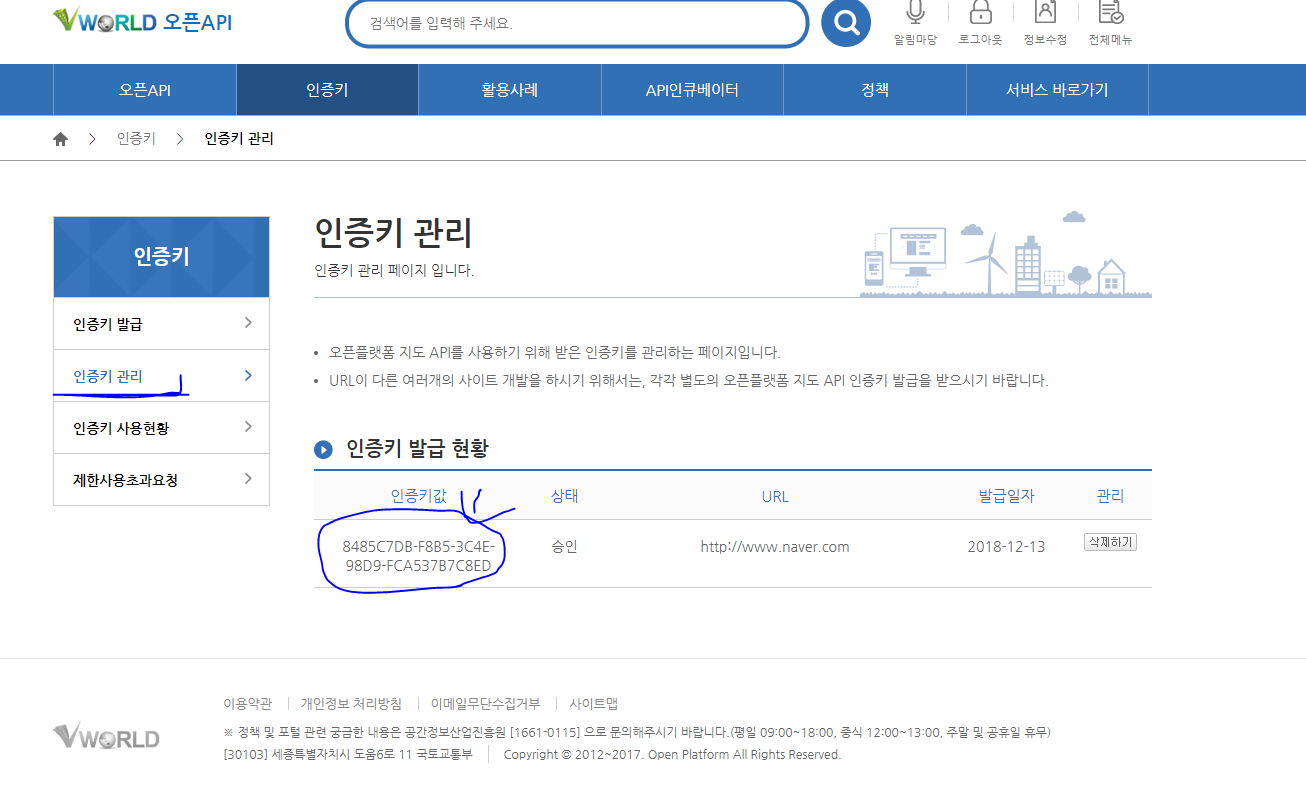

In [16]:
Image("C:\\Users\\504-02\\Desktop\\5.png")

vworld 메인홈페이지에서 지오코더 클릭

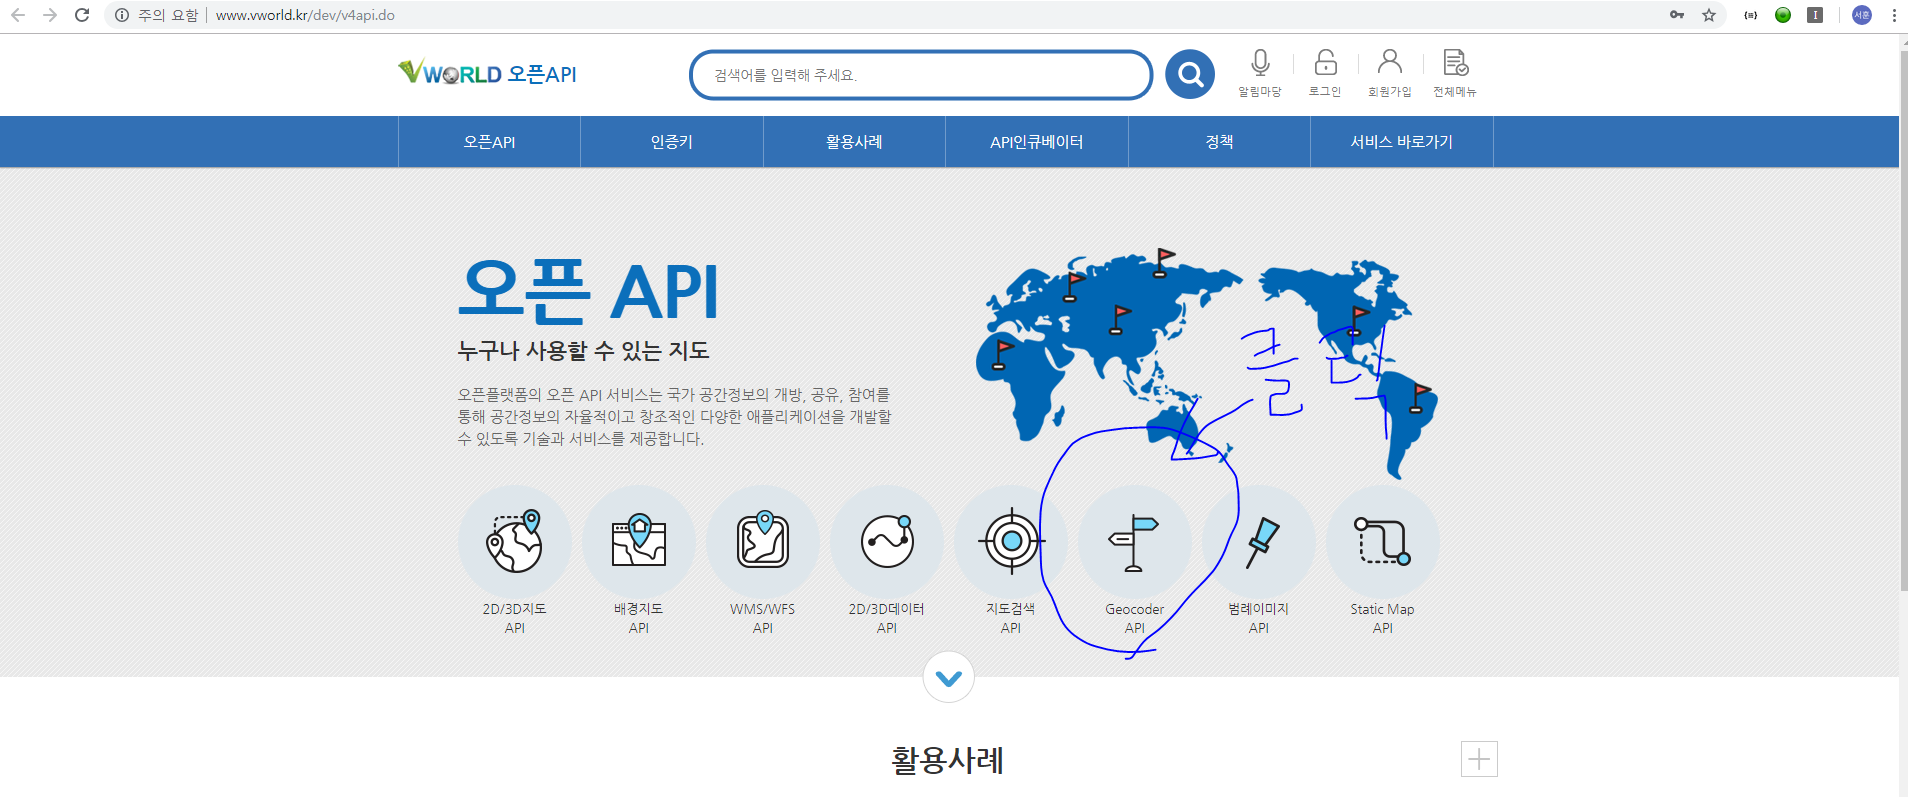

In [12]:
Image("C:\\Users\\504-02\\Desktop\\1.png")

# 맨위에 밑줄을 복사
## 밑에 4줄은 필요한값을 입력
예시) http://api.vworld.kr/req/address?service=address&request=getCoord&key=(본인이 입력 받은 인증키)&format=xml&errorFormat=xml&type=PARCEL&address=서울시 종로구 사직동 9 광화문풍림스페이스본(9-0)
### 파란색 밑줄은 가급적이면 전부 입력하는걸 추천


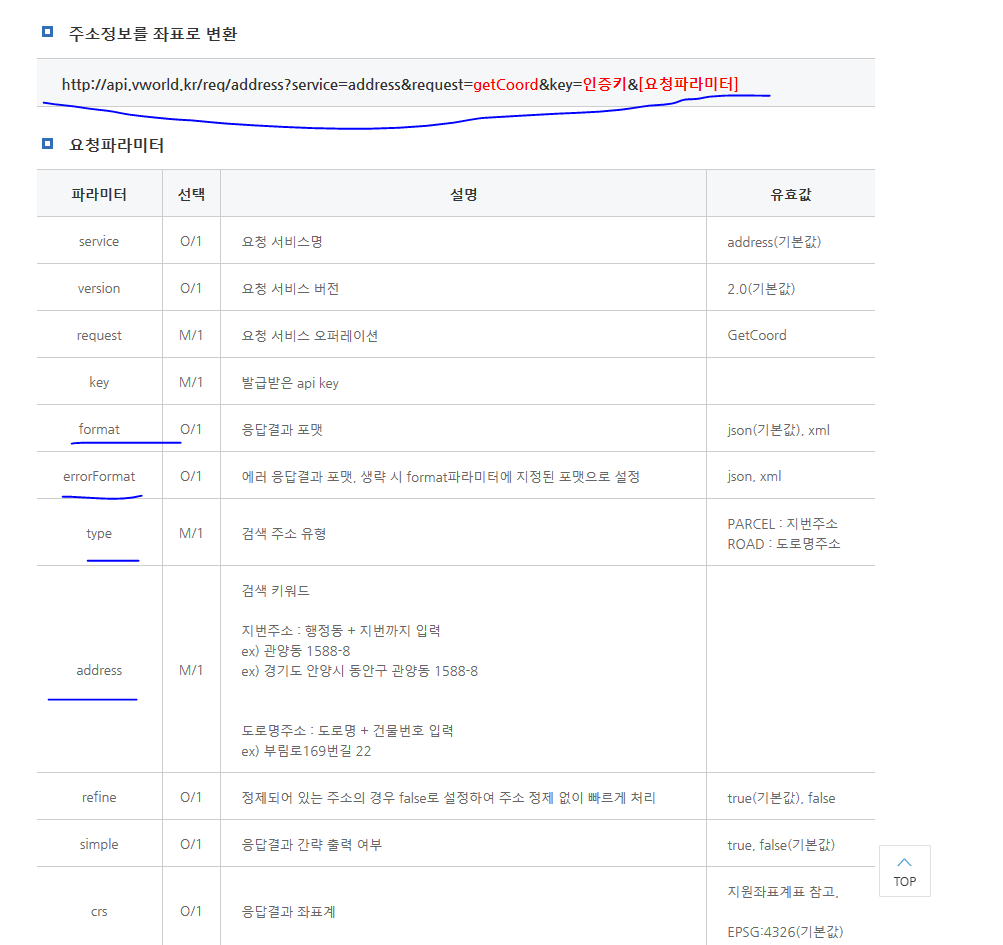

In [18]:
Image("C:\\Users\\504-02\\Desktop\\2.png")

In [5]:
x = input("입력하세요..")
#addressURL ="http://api.vworld.kr/req/address?service=address&request=getCoord&key=8485C7DB-F8B5-3C4E-98D9-FCA537B7C8ED&address="+x +"&type=PARCEL&errorFormat=xml"

url_p1 = "http://api.vworld.kr/req/address?service=address&request=getCoord&key=8485C7DB-F8B5-3C4E-98D9-FCA537B7C8ED&address="
url_p2 = urllib.parse.quote(x)
url_p3 = "&type=PARCEL&format=xml"
addressURL = url_p1 + url_p2 + url_p3
res = urllib.request.urlopen(addressURL)
soup = bs4.BeautifulSoup(res,'xml')
soup

입력하세요..서울시 사직동 9


<?xml version="1.0" encoding="utf-8"?>
<response><service><name>address</name><version>2.0</version><operation>getCoord</operation><time>837(ms)</time></service><status>OK</status><input><type>PARCEL</type><address>서울시 사직동 9</address></input><refined><text>서울특별시 종로구 사직동 9</text><structure><level0> </level0><level1> </level1><level2> </level2><level3> </level3><level4L> </level4L><level4LC> </level4LC><level4A> </level4A><level4AC> </level4AC><level5> </level5><detail> </detail></structure></refined><result><crs>EPSG:4326</crs><point><x>126.968825409555</x><y>37.5743337898788</y></point></result></response>

In [10]:
def getlatlong(x):
    url_p1 = "http://api.vworld.kr/req/address?service=address&request=getCoord&key=8485C7DB-F8B5-3C4E-98D9-FCA537B7C8ED&address="
    url_p2 = urllib.parse.quote(x)
    url_p3 = "&type=PARCEL&format=xml"
    addressURL = url_p1 + url_p2 + url_p3
    res = urllib.request.urlopen(addressURL)
    soup = bs4.BeautifulSoup(res,'xml')
    return soup.find("x").text,soup.find("y").text

In [11]:
getlatlong("서울 사직동 9")

('126.968825409555', '37.5743337898788')